# 19. Remove Nth Node From End of List
Given a linked list, remove the n-th node from the end of list and return its head.
<div class="alert alert-block alert-info">
Example:

Given linked list: 1->2->3->4->5, and n = 2.

After removing the second node from the end, the linked list becomes 1->2->3->5.
</div>
Note:

Given n will always be valid.

Follow up:

Could you do this in one pass?

## Approach 1: Two pass algorithm
Intuition

We notice that the problem could be simply reduced to another one : Remove the (L - n + 1) th node from the beginning in the list , where L is the list length. This problem is easy to solve once we found list length L.

Algorithm

First we will add an auxiliary "dummy" node, which points to the list head. The "dummy" node is used to simplify some corner cases such as a list with only one node, or removing the head of the list. On the first pass, we find the list length L. Then we set a pointer to the dummy node and start to move it through the list till it comes to the (L - n) th node. We relink next pointer of the (L - n) th node to the (L - n + 2) th node and we are done.

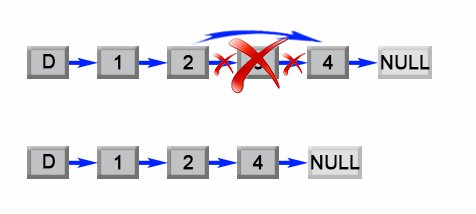
https://leetcode.com/media/original_images/19_Remove_nth_node_from_end_of_listA.png

## Approach 2: One pass algorithm
Algorithm

The above algorithm could be optimized to one pass. Instead of one pointer, we could use two pointers. The first pointer advances the list by n+1 steps from the beginning, while the second pointer starts from the beginning of the list. Now, both pointers are exactly separated by n nodes apart. We maintain this constant gap by advancing both pointers together until the first pointer arrives past the last node. The second pointer will be pointing at the nnth node counting from the last. We relink the next pointer of the node referenced by the second pointer to point to the node's next next node.
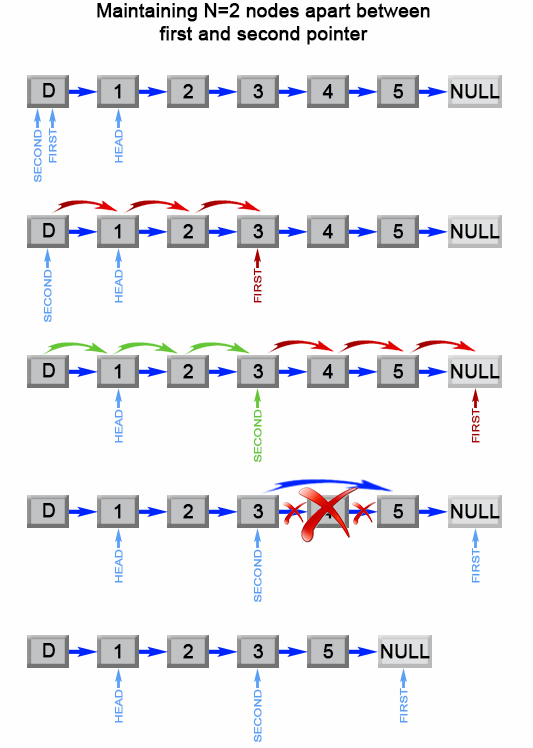
https://leetcode.com/media/original_images/19_Remove_nth_node_from_end_of_listB.png

In [5]:
class ListNode:
    def __init__(self, x):
        self.data = x
        self.next = None
    def __str__(self):
        string = str(self.data)
        if self.next:
          string += ',' + str(self.next)
        return string
class LinkedList:
    def __init__(self):
        self.head = None    # Initialize Head to None
        
    def insert_tail(self, data):
        if(self.head is None): self.insert_head(data)    #If this is first node, call insert_head
        else:
            temp = self.head
            while(temp.next != None):    #traverse to last node
                temp = temp.next
            temp.next = ListNode(data)    #create node & link to tail

    def insert_head(self, data):
        newNod = ListNode(data)    # create a new node
        if self.head != None:
            newNod.next = self.head     # link newNode to head
        self.head = newNod    # make NewNode as Head

    def printList(self):  # print every node data
        tamp = self.head
        while tamp is not None:
            print(tamp.data)
            tamp = tamp.next

def removeNthFromEnd(head: ListNode, n: int) -> ListNode:
    dummy = ListNode
    dummy.next = head
    fast = slow = dummy
    for _ in range(n+1):
        fast = fast.next
    if not fast:
        return head.next
    while fast:
        fast,slow = fast.next,slow.next
    # remove link
    slow.next = slow.next.next
    return head

A = LinkedList()
A.insert_tail(1)
A.insert_tail(2)
A.insert_tail(3)
A.insert_tail(4)
A.insert_tail(5)
A.printList()
head = A.head
removeNthFromEnd(head,2)
A.printList()

1
2
3
4
5
1
2
3
5
